<div style="border: 1px solid thistle; padding: 5px 20px 10px 20px;">
    <h2><font color = "77658f" style=";">Feedback</font></h2><br>
    <font color = "77658f">One of the clearest problem statements seen for this project. Elaborate steps in explaining your logical process. Good visualisation in general, except for SB pairplot - it doesnt contribute value as the sizes of the plots are too small.<br><br>
        • Problem Statement: <b>Meet Portfolio Requirement</b> <br>
        • Data Cleaning and EDA: <b>Meet Portfolio Requirement</b><br>
        • Preprocessing and Modelling: <b>Meet Portfolio Requirement</b><br>
        • Evaluation and Conceptual Understanding: <b>Meet Portfolio Requirement</b><br>
        • Conclusion and Recommendation: <b>Meet Requirement</b><br>
        • Project Organisation: <b>Meet Portfolio Requirement</b><br>
        • Visualisations: <b>Meet Requirement</b><br>
        • Python Syntax and Control Flow: <b>Meet Requirement</b><br>
    </font>
</div>

## Project 2: Ames Housing Sales Price Regression



### Problem Statement

To determine the **coefficient** and **significance** of variables that are essential in accurately determining the prices of Houses in Ames, Iowa to effectively determine their eventual **selling prices** via simple Linear Regression.

This is to ensure that houses that are being marketed can receive appropriate valuation, buyers and sellers can leverage on this model to make a informed decision. 

However, upon looking at the variables, it is clear that the variables do not account for say, income and purchasing powers of residents and total supply of other houses, which SalesPrices are inversely related towards.

Success is evaluated by ensuring that the model has the highest R^2 numbers that are consistent throughout cross validation and train/test split, and minimized MSE error which can be verrified on the Kaggle Website.

### Executive Summary

### Contents:
- [Train/Test Data Import](#Train/Test-Data-Import)
- [Explatory Data Analysis and Cleaning](#Explatory-Data-Analysis-and-Cleaning)
- [Feature Engineering](#Feature-Engineering)
- [Assessment of P values, and Modelling](#Assessment-of-P-values,-and-Modelling)


In [1]:
#*All libraries used should be added here*
import seaborn as sb
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,12
import seaborn as sb
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import norm, skew 
import statsmodels.api as sm
from sklearn import linear_model

## Train/Test Data Import 

#### Read in Train and Test Data


In [2]:
test = pd.read_csv('../datasets/test.csv')
train = pd.read_csv('../datasets/train.csv')
print(train.shape, test.shape)

(2051, 81) (879, 80)


In [3]:
#Adding source column to each dataset for identification and combination, 
#to later combine
train['source'] = 'train'
test['source'] = 'test'
print(train.shape, test.shape)

(2051, 82) (879, 81)


In [4]:
#First, I combined datasets, and find the number of rows
df = pd.concat([train, test])
df.shape


/Users/vincentlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(2930, 82)

## Explatory Data Analysis and Cleaning

In [5]:
#So we have a variety of integers, floats and objects datatypes..
g = df.columns.to_series().groupby(df.dtypes).groups
g

{dtype('int64'): Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr',
        'Enclosed Porch', 'Fireplaces', 'Full Bath', 'Gr Liv Area', 'Half Bath',
        'Id', 'Kitchen AbvGr', 'Lot Area', 'Low Qual Fin SF', 'MS SubClass',
        'Misc Val', 'Mo Sold', 'Open Porch SF', 'Overall Cond', 'Overall Qual',
        'PID', 'Pool Area', 'Screen Porch', 'TotRms AbvGrd', 'Wood Deck SF',
        'Year Built', 'Year Remod/Add', 'Yr Sold'],
       dtype='object'),
 dtype('float64'): Index(['Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1',
        'BsmtFin SF 2', 'Garage Area', 'Garage Cars', 'Garage Yr Blt',
        'Lot Frontage', 'Mas Vnr Area', 'SalePrice', 'Total Bsmt SF'],
       dtype='object'),
 dtype('O'): Index(['Alley', 'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Qual',
        'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air', 'Condition 1',
        'Condition 2', 'Electrical', 'Exter Cond', 'Exter Qual', 'Exterior 1st',
        'Exterior 2nd', 'Fe

#### Variables- A Simple Explanation

- SalePrice - the property's sale price in dollars. 
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [6]:
#Rename Columns to remove spaces and remove uppercase
def rename(dataframe):
    dataframe.columns = [x.lower().replace(' ','_') for x in dataframe.columns]
rename(df)
g = df.columns.to_series().groupby(df.dtypes).groups
g

{dtype('int64'): Index(['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'bedroom_abvgr',
        'enclosed_porch', 'fireplaces', 'full_bath', 'gr_liv_area', 'half_bath',
        'id', 'kitchen_abvgr', 'lot_area', 'low_qual_fin_sf', 'ms_subclass',
        'misc_val', 'mo_sold', 'open_porch_sf', 'overall_cond', 'overall_qual',
        'pid', 'pool_area', 'screen_porch', 'totrms_abvgrd', 'wood_deck_sf',
        'year_built', 'year_remod/add', 'yr_sold'],
       dtype='object'),
 dtype('float64'): Index(['bsmt_full_bath', 'bsmt_half_bath', 'bsmt_unf_sf', 'bsmtfin_sf_1',
        'bsmtfin_sf_2', 'garage_area', 'garage_cars', 'garage_yr_blt',
        'lot_frontage', 'mas_vnr_area', 'saleprice', 'total_bsmt_sf'],
       dtype='object'),
 dtype('O'): Index(['alley', 'bldg_type', 'bsmt_cond', 'bsmt_exposure', 'bsmt_qual',
        'bsmtfin_type_1', 'bsmtfin_type_2', 'central_air', 'condition_1',
        'condition_2', 'electrical', 'exter_cond', 'exter_qual', 'exterior_1st',
        'exterior_2nd', 'fe

#### Understanding the number of nulls in Categorical and Continuous Variables

In [7]:
#categorical variables percentage of missing values 
null = df.isnull().sum()/ len(df) * 100
null = null.drop(null[null == 0].index).sort_values(ascending=False)
null = pd.DataFrame({'Missing Percentage':null})

Text(0.5, 1.0, 'Percent missing data by categorical feature')

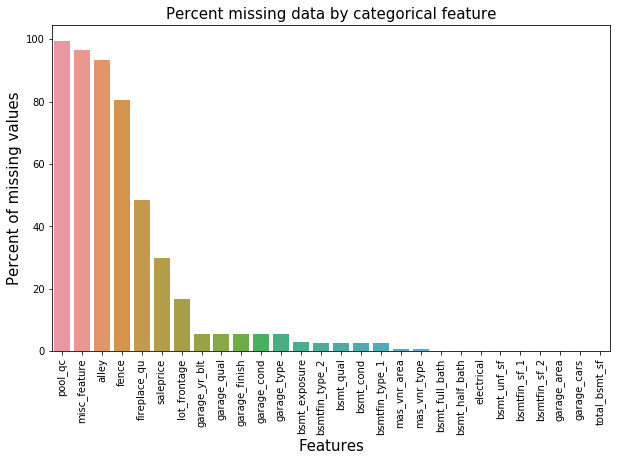

In [8]:
# Visualising missing data
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sb.barplot(x=null.index, y=null['Missing Percentage'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by categorical feature', fontsize=15)
#It seems that Garage and Basement each have the same number of missing variables..

In [9]:
#continuous variables percentage of missing values 
num = df.columns[(df == 0).any()]
num = (df[num] == 0).sum()/ len(df) * 100
num = num.drop(num[num == 0].index).sort_values(ascending=False)
num = pd.DataFrame({'Missing Percentage':num})

#null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)
#null_df = pd.DataFrame({'Missing Percentage':null_df})

Text(0.5, 1.0, 'Percent missing data by continuous feature')

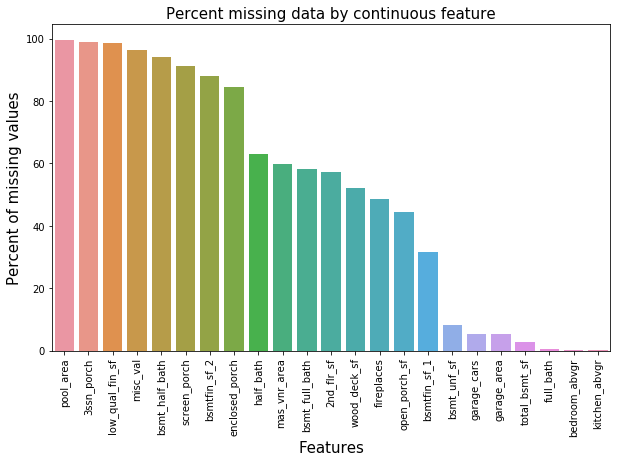

In [10]:
# Visualising missing data
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sb.barplot(x=num.index, y=num['Missing Percentage'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by continuous feature', fontsize=15)

In [11]:
#Will discard Columns that have more than 90% NaN
drop_col = ['alley','low_qual_fin_sf', 'misc_feature', 'misc_val','pool_area', 'pool_qc']
df.drop(drop_col, axis=1, inplace=True)
df.shape

(2930, 76)

Upon removal of null variables, there are 3 main categorical subgroups that required treatment- **Basement, Garage,Fireplace, LotFrontage**

#### Examining and Treatment of Basement Variables

In [12]:
col = ['bsmt_cond','bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_qual']
for i in col:
    no = df[i].isnull().sum()
    print(no)

#Upon inspection of BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual
#These features have an equal number of missing values indicating that NaN is actually just None
#Replacing NA as 'None'- No Basement

col = ['bsmt_cond','bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_qual']
for i in col:
    Nan_rows = df[i].isnull()
    df.loc[Nan_rows, i] = 'None'
#Null values of all Basement features are reduced to 0

80
83
80
81
80


#### Understanding Basement Finished Type Categorical Variables

In [13]:
print(df['bsmtfin_type_1'].unique()); print(df['bsmtfin_type_2'].unique())
#According to documentation http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
#Unf just means unfinished.

['GLQ' 'Unf' 'ALQ' 'Rec' 'None' 'BLQ' 'LwQ']
['Unf' 'Rec' 'None' 'BLQ' 'GLQ' 'LwQ' 'ALQ']


In [14]:
#Changing Unfinished values to None, unfinished 
Unf_rows = (df['bsmtfin_type_1'] == 'Unf')
df.loc[Unf_rows,'bsmtfin_type_1'] = 'None'
print('Valuecount of BsmtFinType1: ', df['bsmtfin_type_1'].value_counts())

Unf_rows = (df['bsmtfin_type_2'] == 'Unf')
df.loc[Unf_rows,'bsmtfin_type_2'] = 'None'
print('Valuecount of BsmtFinType2: ', df['bsmtfin_type_2'].value_counts())

Valuecount of BsmtFinType1:  None    931
GLQ     859
ALQ     429
Rec     288
BLQ     269
LwQ     154
Name: bsmtfin_type_1, dtype: int64
Valuecount of BsmtFinType2:  None    2580
Rec      106
LwQ       89
BLQ       68
ALQ       53
GLQ       34
Name: bsmtfin_type_2, dtype: int64


In [15]:

#Finding columns with bsmt_cond = 'None' and bsmt_unf_sf = 0
zero_df = (df['bsmt_unf_sf'] == 0)
df.loc[zero_df, ].groupby('bsmt_cond').bsmt_unf_sf.count()
print('Zero Values for BsmtUnfSF Before: ', df.loc[zero_df,'bsmt_unf_sf'].count())
zero_df = ((df['bsmt_unf_sf'] == 0) & (df['bsmt_cond'] != 'None'))
df.loc[zero_df,'bsmt_unf_sf'] = df['bsmt_unf_sf'].median()
print('Zero Values for BsmtUnfSF After: ', df.loc[zero_df,'bsmt_unf_sf'].count())
#Changing 0 values and None Values to take the mean value

Zero Values for BsmtUnfSF Before:  244
Zero Values for BsmtUnfSF After:  165


#### Understanding Garage Finished Type Categorical Variables

In [16]:
print(df['garage_cond'].unique()),print(df['garage_finish'].unique()),print(df['garage_qual'].unique()),print(df['garage_type'].unique())

['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']


(None, None, None, None)

In [17]:
#Null values means no Garage present
#Changing other Garage attributes values which have no garage to have simply 0 area, or None Categorical Type
null_g = df['garage_cond'].isnull() 
df.loc[null_g, ['garage_cond','garage_finish','garage_qual','garage_type']] = 'None'
df.loc[null_g, ['garage_area','garage_cars','garage_yr_blt']] = 0

#### Imputing FireplaceQu

In [18]:
null_f = df['fireplace_qu'].isnull()
df.loc[null_f, 'fireplace_qu'] = 'None'

#Fireplace quality and Fireplace have similar null columns
#Changing NA values which means no fireplace to be 'None'

#### Imputing Fence and LotFrontage

In [19]:
#Null values represent No Fence and therefore imput None
#Changing 0 values and None Values to take the mean value
df['fence'].fillna('None', inplace=True)
df['lot_frontage'].fillna(df['lot_frontage'].median(), inplace=True)
print ('Null values of Fence: ', df['fence'].isnull().sum())
print ('Null values of LotFrontage: ', df['lot_frontage'].isnull().sum())

Null values of Fence:  0
Null values of LotFrontage:  0


#### Imputing Masonry Veneer Variables

In [20]:
#All Null values of MasVnrType will be filled with ‘None’ 
#and corresponding MasVnrArea will be zero
#MasVnrType with MasVnrArea are related. If area is zero then type 
#should be ‘None’ according to description
#Similarly of type is ‘None’ then Area should be zero
#Hence we will update MasVnrType as ‘None’ where MasVnrArea is zero
#Also all Null values of Type fill be filled with ‘None’ and corresponding
#Area will be zero
null_m = df['mas_vnr_type'].isnull()
df.loc[null_m, 'mas_vnr_area'] = 0
df.loc[null_m, 'mas_vnr_type'] = 'None'

null_m = (df['mas_vnr_area'] == 0)
df.loc[null_m, 'mas_vnr_type'] = 'None'

null_m = (df['mas_vnr_type'] == 'None')
df.loc[null_m, 'mas_vnr_area'] = 0


## Feature Engineering

#### Merging Porch and Bath Variables

In [21]:
df['porch'] = df['open_porch_sf']+df['enclosed_porch']+df['3ssn_porch']+df['screen_porch']
df['porch'] = df['porch'].astype(bool).astype(int)

df['porch'].value_counts()

1    2055
0     875
Name: porch, dtype: int64

In [22]:
#Combining Full Bath and Bsmt Full Baths as just one single fullbath
#Combining Half Bath and Bsmt Half Bath to just one single halfbath
df['full_bath'] = df['full_bath'] + df['bsmt_full_bath']
df['half_bath'] = df['half_bath'] + df['bsmt_half_bath']

In [23]:
drop_col = ['bsmt_full_bath','bsmt_half_bath', '3ssn_porch', 'enclosed_porch', 'open_porch_sf','screen_porch']
df.drop(drop_col, axis=1, inplace=True)
df.shape

(2930, 71)

In [24]:
null_df = df.columns[df.isnull().any()]
num = df[null_df].isnull().sum()
num

bsmt_unf_sf        1
bsmtfin_sf_1       1
bsmtfin_sf_2       1
electrical         1
full_bath          2
half_bath          2
saleprice        879
total_bsmt_sf      1
dtype: int64

In [25]:
#For Continuous variables, we will impute with MEAN and 
#for categorical data we will impute with MODE
cont_col = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf','total_bsmt_sf']
cat_col = ['electrical', 'full_bath','half_bath']
for i in cont_col:
    df[i].fillna(df[i].mean(), inplace=True)
    print('Null values left for {} is: {:d}'.format(i, df[i].isnull().sum()))
    
for j in cat_col:
    df[j].fillna(df[j].mode()[0], inplace=True)
    print('Null values left for {} is: {:d}'.format(j, df[j].isnull().sum()))

Null values left for bsmtfin_sf_1 is: 0
Null values left for bsmtfin_sf_2 is: 0
Null values left for bsmt_unf_sf is: 0
Null values left for total_bsmt_sf is: 0
Null values left for electrical is: 0
Null values left for full_bath is: 0
Null values left for half_bath is: 0


#### Understanding how the squarefootage variables look like

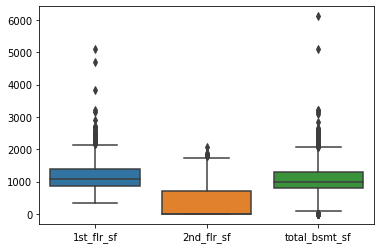

In [26]:
#To find out distribution of square foot variables
sb.boxplot(data=df[['1st_flr_sf','2nd_flr_sf','total_bsmt_sf']])

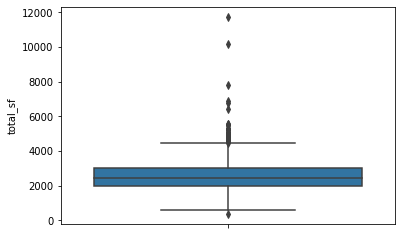

In [27]:
#Feature Engineering, combing all SF into one variable: Total SF
df['total_sf'] = df['1st_flr_sf'] + df['2nd_flr_sf'] + df['total_bsmt_sf']
sb.boxplot(x=df['total_sf'], orient='v')
#Dropping now useless columns
col_fe = ['1st_flr_sf','2nd_flr_sf','total_bsmt_sf',]
df.drop(col_fe, axis=1, inplace=True)

In [28]:
#Feature Engineering, combing all rooms into one variable: Total Rooms
df['total_rooms'] = df['bedroom_abvgr'] + df['totrms_abvgrd']

# Creating two new variables that account for difference in years for remodelling and its construction from the time it is sold

df['year_blt_age'] = df['yr_sold'] - df['year_built']
df['remod_age'] = df['yr_sold'] - df['year_remod/add']
df.drop(['year_built','year_remod/add'], axis=1, inplace=True)
df.shape

(2930, 70)

In [29]:
# Drop Feature engineered columns
col_fe = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf','bedroom_abvgr','totrms_abvgrd']
df.drop(col_fe, axis=1, inplace=True)

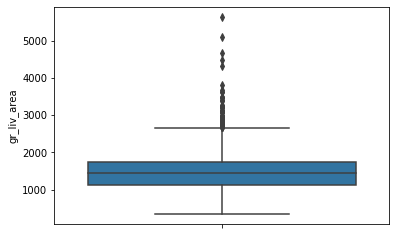

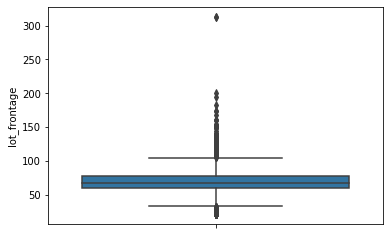

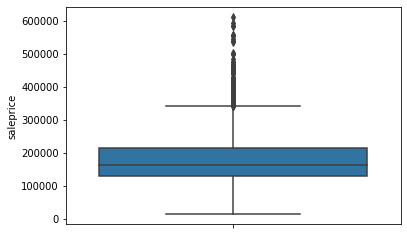

In [30]:
#To find out distribution of SalesPrice, Area above ground and  linear feet of street connected to propety
sb.boxplot(x=df['gr_liv_area'], orient='v')
plt.show()
sb.boxplot(x=df['lot_frontage'], orient='v')
plt.show()
sb.boxplot(x=df['saleprice'], orient='v')

In [31]:
#Deleting outliers
df = df.drop(df[(df['gr_liv_area']>4000) & (df['saleprice']<300000)].index)

#### Checking for remaining null variables

In [32]:
#No more nulls- salesprice nulls represent data in test set
null_df = df.columns[df.isnull().any()]
num = df[null_df].isnull().sum()
num

saleprice    879
dtype: int64

#### Examining Distributions and fixing variables that are not normal- Taking Log SalesPrice and other variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c21cd5f10>,
      dtype=object)

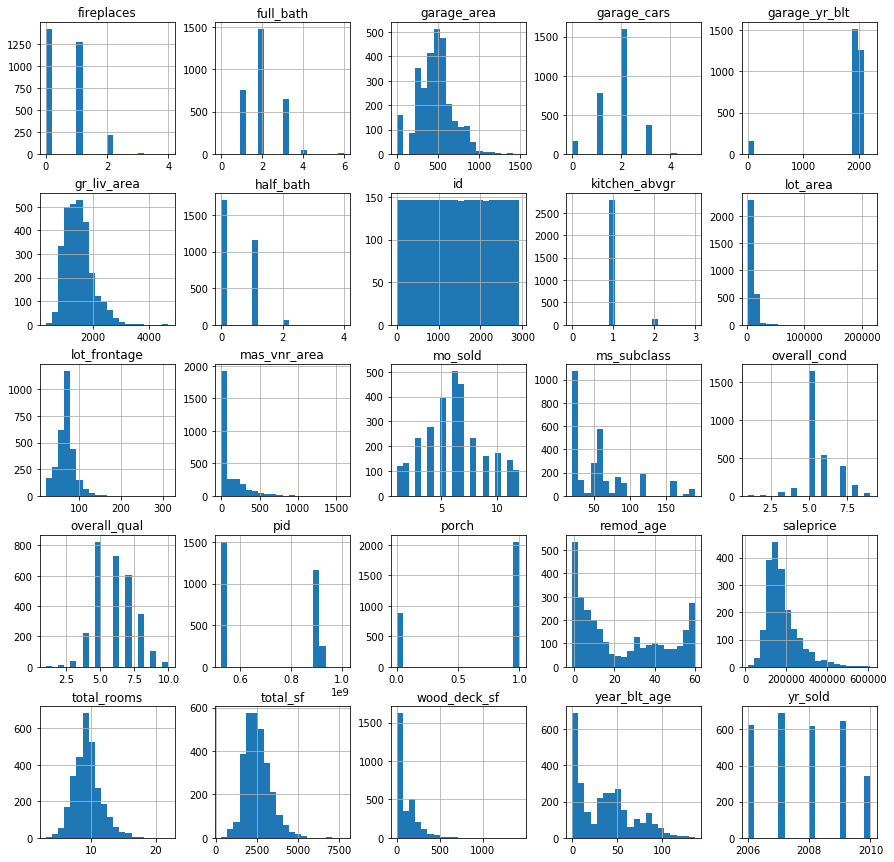

In [33]:
df.hist(figsize=(15, 15), bins = 20)
#The ones that have a right skew are SalesPrice, GrLivingArea, LotFrontage, Total SF
#So I take logs


 mu = 181469.70 and sigma = 79239.34



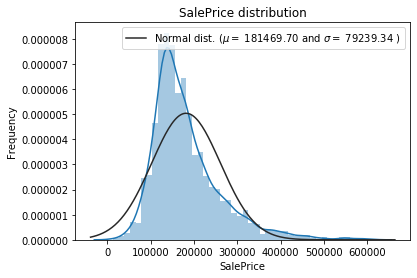

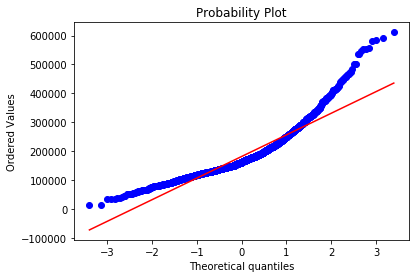

In [34]:
sb.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

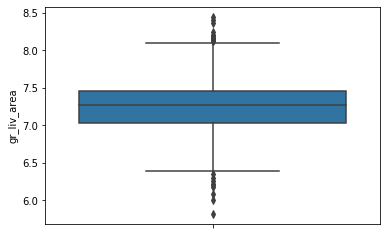

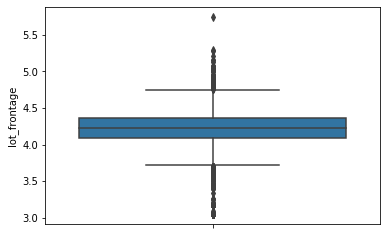

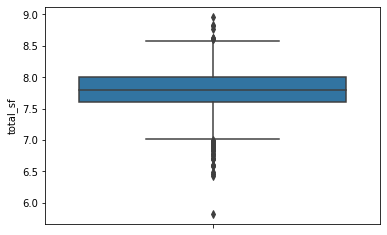

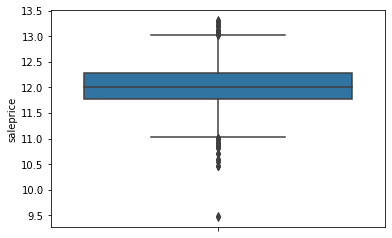

In [35]:

#Taking Ln Transformation which greatly reduces the variation used when having too extreme values
df['gr_liv_area'] = np.log(df['gr_liv_area'])
df['lot_frontage'] = np.log(df['lot_frontage'])
df['total_sf'] = np.log(df['total_sf'])
df['saleprice'] = np.log(df['saleprice'])
train['SalePrice'] = np.log(train['SalePrice'])
#The sales price exhibited a right skewed distribution which was corrected by taking the log. This is to fit in Gaussian assumptions for regression.
#plotting after transformation
sb.boxplot(x=df['gr_liv_area'], orient='v')
plt.show()
sb.boxplot(x=df['lot_frontage'], orient='v')
plt.show()
sb.boxplot(x=df['total_sf'], orient='v')
plt.show()
sb.boxplot(x=df['saleprice'], orient='v')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c238fb0d0>,
      dtype=object)

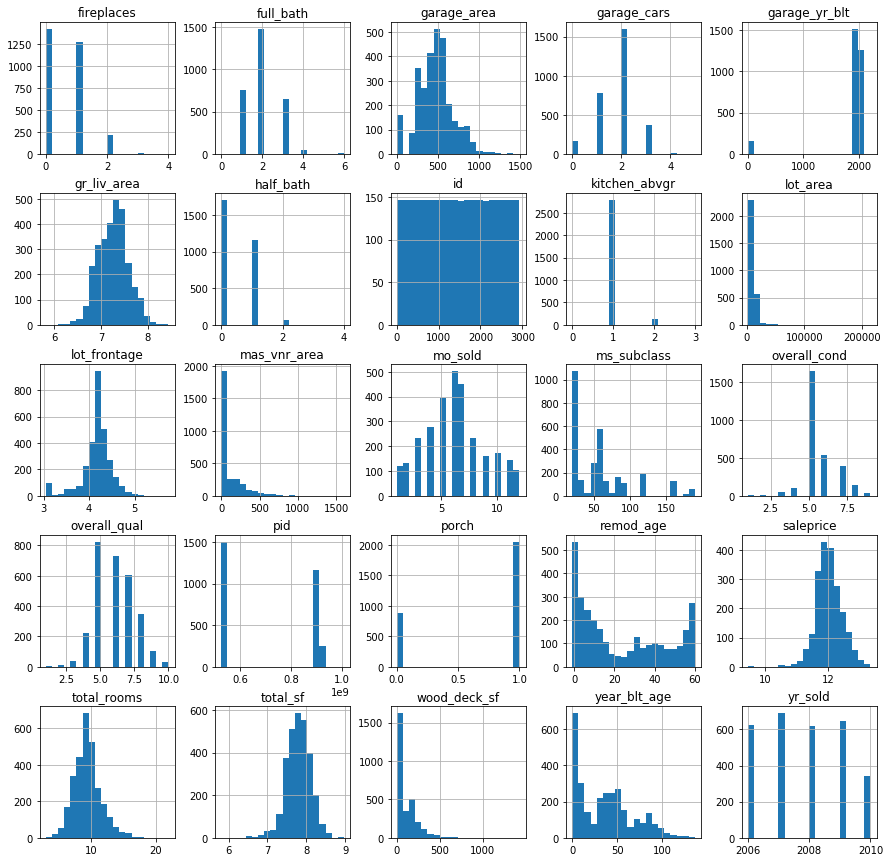

In [36]:
df.hist(figsize=(15, 15), bins = 20)


 mu = 2.57 and sigma = 0.03



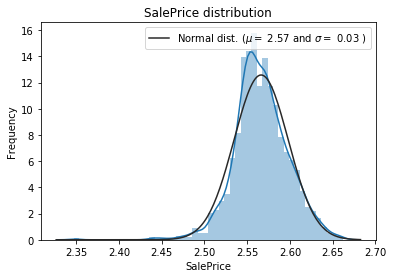

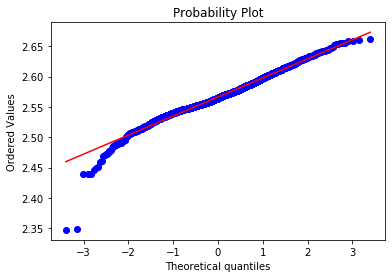

In [37]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sb.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [38]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']
#print(train.shape, test.shape)

In [39]:
#identifying numerical and categorical features.
#We will drop the variables which have mode > 80%. This is because there is very less variability and hence might not have significant contribution to the model.
num_feat = df.dtypes[train.dtypes != 'object'].index
print('Total of numeric features: ', len(num_feat))
cat_feat = df.dtypes[train.dtypes == 'object'].index
print('Total of categorical features: ', len(cat_feat))

# Highest value Frequency percentage in categorical variables 
for i in list(cat_feat):
    pct = df[i].value_counts()[0] / 2930
    print('Highest value Percentage of {}: {:3f}'.format(i, pct))  
#continuous variables percentage of missing values 
num = df.columns[(df == 0).any()]
num = (df[num] == 0).sum()/ len(df) * 100
num = num.drop(num[num == 0].index).sort_values(ascending=False)
num = pd.DataFrame({'Missing Percentage':num})

Total of numeric features:  25
Total of categorical features:  40
Highest value Percentage of bldg_type: 0.826962
Highest value Percentage of bsmt_cond: 0.892150
Highest value Percentage of bsmt_exposure: 0.650512
Highest value Percentage of bsmt_qual: 0.437884
Highest value Percentage of bsmtfin_type_1: 0.317747
Highest value Percentage of bsmtfin_type_2: 0.879863
Highest value Percentage of central_air: 0.932423
Highest value Percentage of condition_1: 0.860410
Highest value Percentage of condition_2: 0.989078
Highest value Percentage of electrical: 0.915017
Highest value Percentage of exter_cond: 0.869283
Highest value Percentage of exter_qual: 0.613993
Highest value Percentage of exterior_1st: 0.350171
Highest value Percentage of exterior_2nd: 0.346416
Highest value Percentage of fence: 0.804096
Highest value Percentage of fireplace_qu: 0.485324
Highest value Percentage of foundation: 0.446416
Highest value Percentage of functional: 0.930375
Highest value Percentage of garage_cond:

In [40]:
# Drop columns which have frequency of value more than 80% of all values 

col_drop = ['bldg_type','bsmt_cond','bsmtfin_type_2','central_air','condition_1','condition_2','electrical','exter_cond',
           'fence', 'functional','garage_cond','garage_qual','heating','land_contour','land_slope','paved_drive','roof_matl',
           'sale_type','street','utilities']
df.drop(col_drop, axis=1, inplace=True)
print('Total features after dropping categorical features: ', df.shape)

Total features after dropping categorical features:  (2928, 45)


In [41]:
df.to_csv('../datasets/train_test_cleaned.csv')
#saves cleaned data
df.columns

Index(['bsmt_exposure', 'bsmt_qual', 'bsmtfin_type_1', 'exter_qual',
       'exterior_1st', 'exterior_2nd', 'fireplace_qu', 'fireplaces',
       'foundation', 'full_bath', 'garage_area', 'garage_cars',
       'garage_finish', 'garage_type', 'garage_yr_blt', 'gr_liv_area',
       'half_bath', 'heating_qc', 'house_style', 'id', 'kitchen_abvgr',
       'kitchen_qual', 'lot_area', 'lot_config', 'lot_frontage', 'lot_shape',
       'ms_subclass', 'ms_zoning', 'mas_vnr_area', 'mas_vnr_type', 'mo_sold',
       'neighborhood', 'overall_cond', 'overall_qual', 'pid', 'roof_style',
       'saleprice', 'wood_deck_sf', 'yr_sold', 'source', 'porch', 'total_sf',
       'total_rooms', 'year_blt_age', 'remod_age'],
      dtype='object')

In [42]:
#select the features that have more than 40% correlation to the target variable
#drop features that have the mode that accounts for more than 80% (removal of unvariable features.)

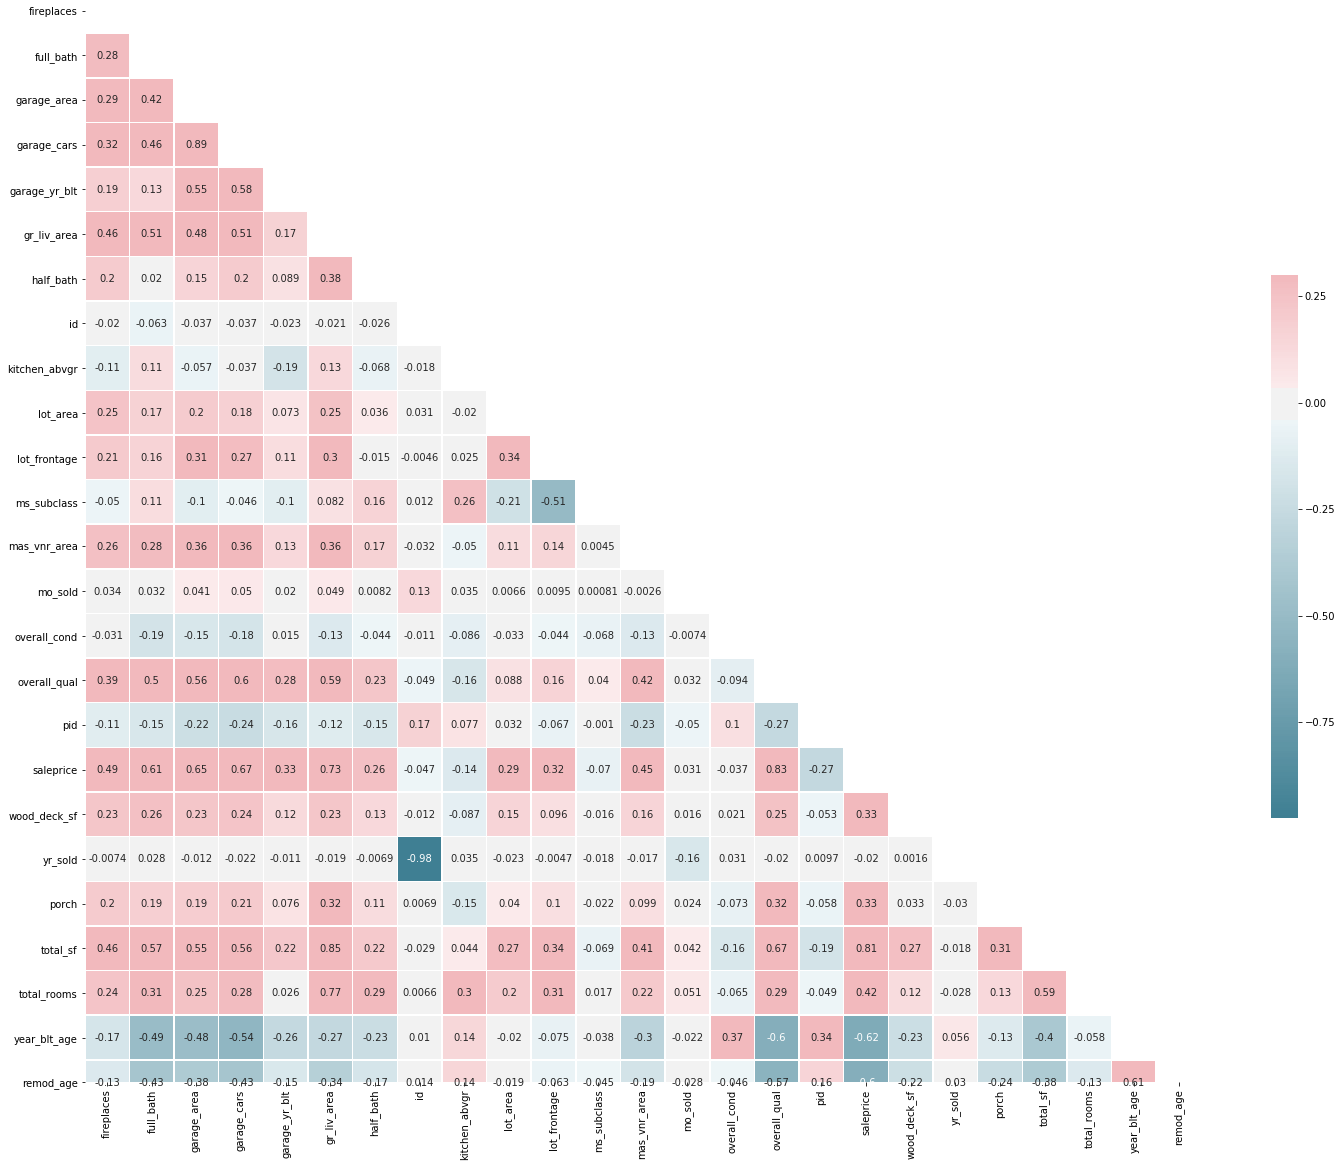

In [43]:
#Find correlation for numeric variables

target = 'saleprice'

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 20))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Judging from the above Heatmap plot, I can determine that fireplaces, the number of full baths, garage area, living area and overall quality were roughly the main determinants to determine sales prices

/Users/vincentlee/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vincentlee/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


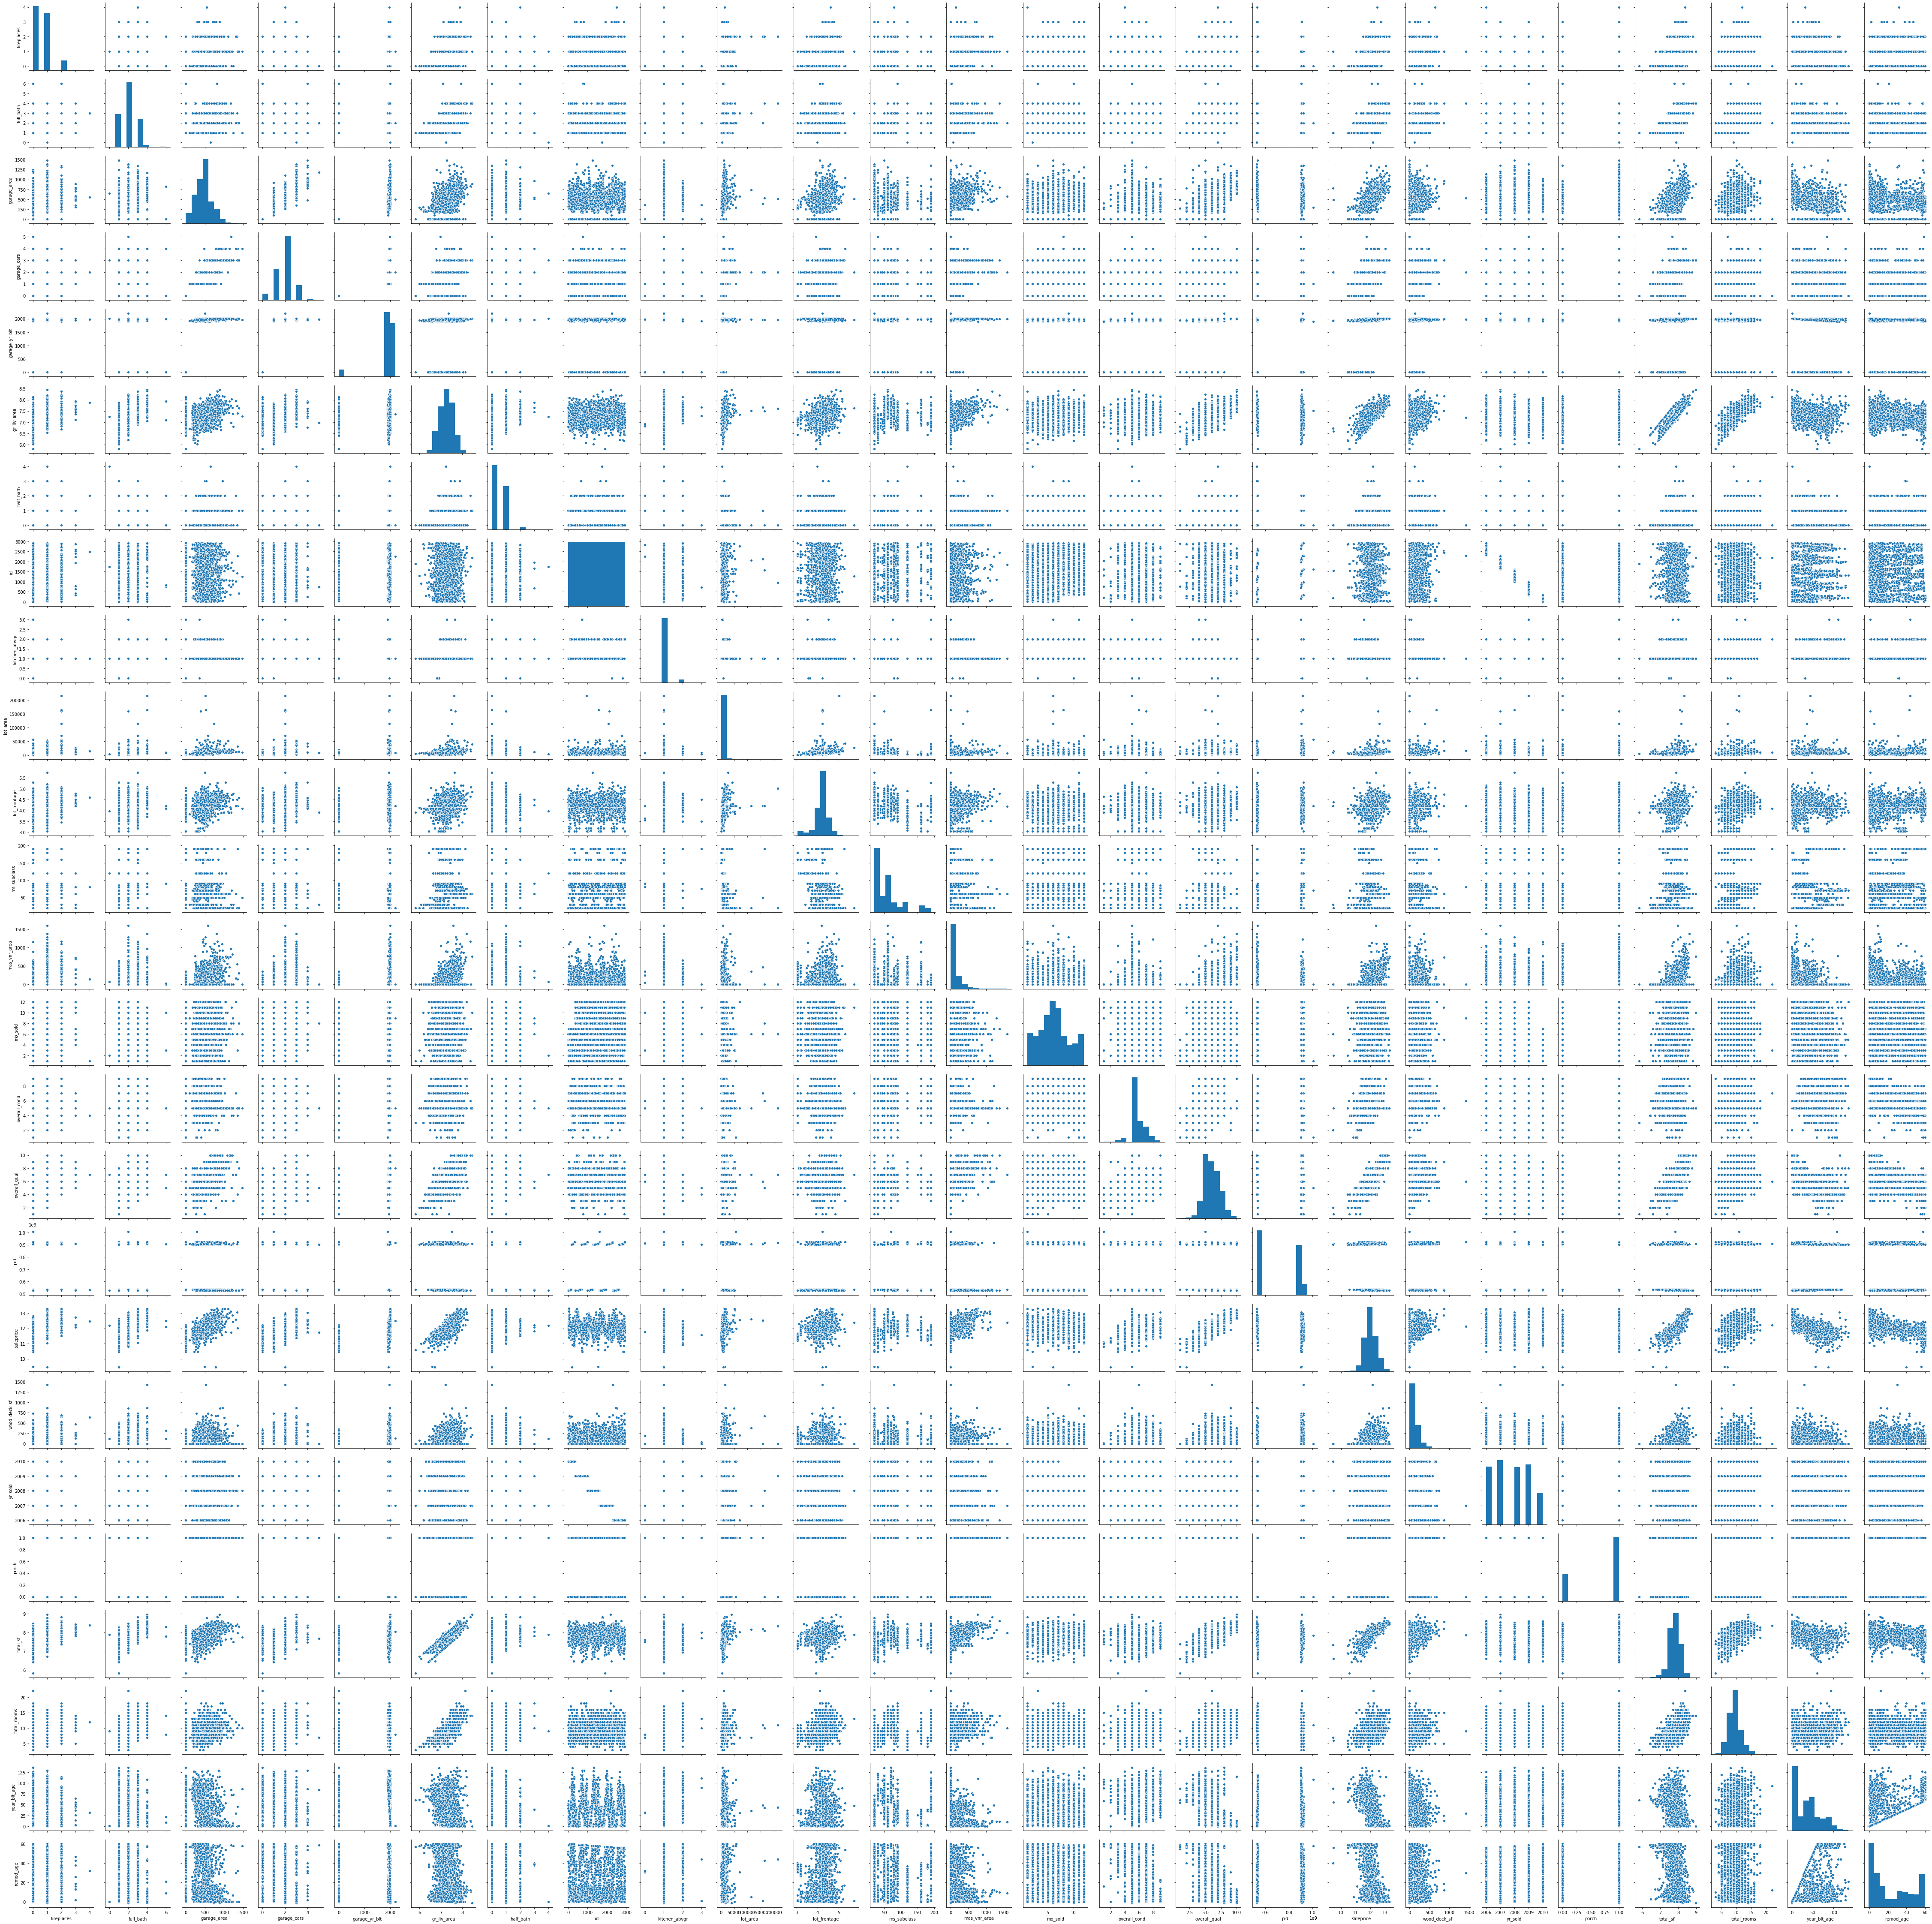

In [44]:
sb.pairplot(df)

## Assessment of P values, and Modelling

#### Basic Linear Regression with all Fitted Variables

In [45]:
cat_cols = df.dtypes[df.dtypes == 'object'].index
cat_cols


Index(['bsmt_exposure', 'bsmt_qual', 'bsmtfin_type_1', 'exter_qual',
       'exterior_1st', 'exterior_2nd', 'fireplace_qu', 'foundation',
       'garage_finish', 'garage_type', 'heating_qc', 'house_style',
       'kitchen_qual', 'lot_config', 'lot_shape', 'ms_zoning', 'mas_vnr_type',
       'neighborhood', 'roof_style', 'source'],
      dtype='object')

In [46]:
#Integer conversions (Label Encoder)
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

cat_cols = ['bsmt_exposure', 'bsmt_qual', 'bsmtfin_type_1', 'exter_qual',
       'exterior_1st', 'exterior_2nd', 'fireplace_qu', 'foundation',
       'garage_finish', 'garage_type', 'heating_qc', 'house_style',
       'kitchen_qual', 'lot_config', 'lot_shape','ms_zoning', 'mas_vnr_type', 
       'neighborhood', 'roof_style'] 
for i in cat_cols:
     df[i] = lc.fit_transform(df[i])
    
df.shape

(2928, 45)

In [47]:
#One hot encoding

col_encod = ['bsmt_exposure', 'bsmt_qual', 'bsmtfin_type_1', 'exter_qual',
       'exterior_1st', 'exterior_2nd', 'fireplace_qu', 'foundation',
       'garage_finish', 'garage_type', 'heating_qc', 'house_style',
       'kitchen_qual', 'lot_config', 'lot_shape', 'ms_zoning','mas_vnr_type', 
       'neighborhood', 'roof_style']
df = pd.get_dummies(df, columns=col_encod)

df.shape

(2928, 176)

In [48]:

target = 'saleprice'

corr = df.corr()
corr_abs = corr.abs()

nr_num_cols = len(num_feat)

ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]
print(ser_corr)

saleprice           1.000000
overall_qual        0.825607
total_sf            0.814989
gr_liv_area         0.727193
garage_cars         0.667439
garage_area         0.654759
year_blt_age        0.624988
full_bath           0.610343
remod_age           0.601441
exter_qual_3        0.586479
foundation_2        0.548667
kitchen_qual_4      0.542171
fireplace_qu_3      0.506877
exter_qual_2        0.495772
fireplaces          0.486948
bsmt_qual_0         0.485461
heating_qc_0        0.477894
bsmtfin_type_1_2    0.464810
bsmt_qual_5         0.458505
kitchen_qual_0      0.449267
mas_vnr_area        0.447927
garage_finish_3     0.443966
garage_type_1       0.423486
total_rooms         0.421232
garage_finish_0     0.420087
Name: saleprice, dtype: float64


In [49]:
# Drop columns based on corr < 40% 

col_drop_corr = ['garage_yr_blt','lot_frontage','wood_deck_sf','porch','lot_area',
                 'half_bath','kitchen_abvgr','ms_subclass',
                 'overall_cond']
df.drop(col_drop_corr, axis=1, inplace=True)
print('Total features: ', df.shape)

Total features:  (2928, 167)


In [50]:
#Dividing back into test and train dataset
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

train

fireplaces  full_bath  garage_area  garage_cars  gr_liv_area    id  \
0              0        2.0        475.0          2.0     7.299121   109   
1              1        3.0        559.0          2.0     7.660114   544   
2              0        2.0        246.0          1.0     6.963190   153   
3              0        2.0        400.0          2.0     7.275172   318   
4              0        2.0        484.0          2.0     7.275865   255   
...          ...        ...          ...          ...          ...   ...   
2046           1        3.0        520.0          2.0     7.454720  1587   
2047           0        1.0        539.0          2.0     6.758095   785   
2048           1        1.0        342.0          2.0     7.556428   916   
2049           2        2.0        294.0          1.0     7.090077   639   
2050           1        2.0        442.0          2.0     7.497762    10   

      mas_vnr_area  mo_sold  overall_qual        pid  ...  neighborhood_24  \
0            289.0        3             6  533352170  ...                0   
1            132.0        4             7  531379050  ...                0   
2              0.0        1             5  535304180  ...                0   
3              0.0        4             5  916386060  ...                0   
4              0.0        3             6  906425045  ...                0   
...            ...      ...           ...        ...  ...              ...   
2046           0.0        1             8  921126030  ...                0   
2047           0.0        3             4  905377130  ...                0   
2048           0.0        3             6  909253010  ...                0   
2049           0.0       11             4  535179160  ...                0   
2050           0.0        6             7  527162130  ...                0   

      neighborhood_25 neighborhood_26  neighborhood_27  roof_style_0  \
0                   0               0                0             0   
1                   0               0                0             0   
2                   0               0                0             0   
3                   0               1                0             0   
4                   0               0                0             0   
...               ...             ...              ...           ...   
2046                0               1                0             0   
2047                0               0                0             0   
2048                0               0                0             0   
2049                0               0                0             0   
2050                0               0                0             0   

      roof_style_1  roof_style_2  roof_style_3  roof_style_4  roof_style_5  
0                1             0             0             0             0  
1                1             0             0             0             0  
2                1             0             0             0             0  
3                1             0             0             0             0  
4                1             0             0             0             0  
...            ...           ...           ...           ...           ...  
2046             1             0             0             0             0  
2047             1             0             0             0             0  
2048             1             0             0             0             0  
2049             1             0             0             0             0  
2050             1             0             0             0             0  

[2049 rows x 167 columns]

In [51]:
test.drop(['source'], axis = 1, inplace=True)
train.drop(['source'], axis = 1, inplace=True)
print(train.shape, test.shape)

(2049, 166) (879, 166)


/Users/vincentlee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
#Split-out validation dataset
pred_col = [x for x in train.columns if x not in ['saleprice', 'id']]
X = train[pred_col]
y = train['saleprice']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state= 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1536, 164), (513, 164), (1536,), (513,))

In [53]:
#Declare algorithm
lr = LinearRegression()

#Fit the training set
lr.fit(X_train, y_train)

score = lr.score(X_test,y_test)
print ('Model Score: {:4f}'.format(score))

Model Score: 0.890788


In [54]:
scores = cross_val_score(lr, X_train, y_train, cv=5)
scores.mean().round(4)

0.8731

In [55]:
x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train)
results = model.fit()

/Users/vincentlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     108.3
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:43:07   Log-Likelihood:                 1047.8
No. Observations:                1536   AIC:                            -1820.
Df Residuals:                    1398   BIC:                            -1083.
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.3429      1.260      1.860      0.063      -0.128       4.814
fireplaces           0.0503      0.014      3.532      0.000       0.022       0.078
full_bath            0.0079      0.007      1.208      0.227      -0.005       0.021
garage_area          0.0001      4e-05      3.006      0.003    4.18e-05       0.000
garage_cars          0.0129      0.012      1.075      0.283      -0.011       0.036
gr_liv_area          0.2469      0.050      4.893      0.000       0.148       0.346
mas_vnr_area      4.547e-05   3.18e-05      1.428      0.153    -1.7e-05       0.000
mo_sold            2.91e-06      0.001      0.002      0.998      -0.002       0.002
overall_qual         0.0579      0.005     11.608      0.000       0.048       0.068
pid               1.813e-10   5.25e-11      3.454      0.001    7.83e-11    2.84e-10
yr_sold             -0.0013      0.003     -0.496      0.620      -0.007       0.004
total_sf             0.2531      0.049      5.203      0.000       0.158       0.348
total_rooms         -0.0022      0.003     -0.767      0.444      -0.008       0.003
year_blt_age        -0.0011      0.000     -3.401      0.001      -0.002      -0.000
remod_age           -0.0021      0.000     -7.906      0.000      -0.003      -0.002
bsmt_exposure_0      0.4637      0.252      1.838      0.066      -0.031       0.959
bsmt_exposure_1      0.5235      0.253      2.072      0.038       0.028       1.019
bsmt_exposure_2      0.4382      0.252      1.741      0.082      -0.056       0.932
bsmt_exposure_3      0.4386      0.253      1.735      0.083      -0.057       0.935
bsmt_exposure_4      0.4789      0.260      1.844      0.065      -0.031       0.989
bsmt_qual_0          0.5244      0.253      2.069      0.039       0.027       1.021
bsmt_qual_1          0.4106      0.253      1.622      0.105      -0.086       0.907
bsmt_qual_2          0.4793      0.253      1.894      0.058      -0.017       0.976
bsmt_qual_3          0.4602      0.261      1.764      0.078      -0.052       0.972
bsmt_qual_4      -1.609e-14   1.05e-14     -1.536      0.125   -3.66e-14    4.46e-15
bsmt_qual_5          0.4684      0.253      1.853      0.064      -0.027       0.964
bsmtfin_type_1_0     0.4284      0.210      2.043      0.041       0.017       0.840
bsmtfin_type_1_1     0.4011      0.211      1.905      0.057      -0.012       0.814
bsmtfin_type_1_2     0.4052      0.211      1.922      0.055      -0.008       0.819
bsmtfin_type_1_3     0.3788      0.210      1.806      0.071      -0.033       0.790
bsmtfin_type_1_4     0.3390      0.210      1.617      0.106      -0.072       0.750
bsmtfin_type_1_5     0.3904      0.210      1.855      0.064      -0.022       0.803
exter_qual_0         0.6358      0.317      2.009      0.045       0.015       1.257
exter_qual_1         0.

#### Basic Linear Regression with Screened Variables (1) 

In the first variable screened regression, I tried to only regress variables with a P value < 0.05, to show that this is statistically significant

In [57]:
pred_col_2 = ["fireplaces","garage_area", "gr_liv_area","overall_qual", "pid","total_sf", "year_blt_age",
            "remod_age","bsmt_exposure_1", "bsmt_qual_0", "neighborhood_7","neighborhood_10" ,"neighborhood_13",
            "neighborhood_18", "neighborhood_19","neighborhood_21", "neighborhood_25"]

X2 = train[pred_col_2]
y2 = train['saleprice']

scaler = StandardScaler()
scaler.fit_transform(X2)

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,random_state= 42)
X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape

((1536, 17), (513, 17), (1536,), (513,))

In [58]:
#Declare algorithm
lr_2 = LinearRegression()

#Fit the training set
lr_2.fit(X2_train, y2_train)

score = lr_2.score(X2_test,y2_test)
print ('Model Score: {:4f}'.format(score))

Model Score: 0.850561


In [59]:
# Cross-Val Score of Model


print(cross_val_score(lr_2, X2_train, y2_train, cv=10))
print(cross_val_score(lr_2, X2_train, y2_train, cv=10).mean())

[0.90843888 0.84924927 0.84096999 0.88934155 0.82851503 0.91759045
 0.87089664 0.88062492 0.89265321 0.84236944]
0.8720649369586082


In [60]:
# Predicting Test-Values
X = test[pred_col_2]
pred = lr_2.predict(X)


In [61]:
x2_train = sm.add_constant(X2_train)
new_model = sm.OLS(y2_train, x2_train)
results_2 = new_model.fit()

/Users/vincentlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [62]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     642.1
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:43:08   Log-Likelihood:                 800.50
No. Observations:                1536   AIC:                            -1565.
Df Residuals:                    1518   BIC:                            -1469.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.4932      0.129     57.978      0.000       7.240       7.747
fireplaces          0.0723      0.007     10.508      0.000       0.059       0.086
garage_area         0.0002   2.32e-05      8.743      0.000       0.000       0.000
gr_liv_area         0.1593      0.023      6.858      0.000       0.114       0.205
overall_qual        0.0661      0.005     14.679      0.000       0.057       0.075
pid              2.336e-11   2.29e-11      1.022      0.307   -2.15e-11    6.82e-11
total_sf            0.3754      0.026     14.531      0.000       0.325       0.426
year_blt_age       -0.0020      0.000    -10.841      0.000      -0.002      -0.002
remod_age          -0.0024      0.000     -9.929      0.000      -0.003      -0.002
bsmt_exposure_1     0.0899      0.013      6.747      0.000       0.064       0.116
bsmt_qual_0         0.0730      0.016      4.471      0.000       0.041       0.105
neighborhood_7     -0.0246      0.016     -1.564      0.118      -0.055       0.006
neighborhood_10     0.4672      0.145      3.222      0.001       0.183       0.752
neighborhood_13    -0.1541      0.038     -4.007      0.000      -0.230      -0.079
neighborhood_18     0.0711      0.026      2.733      0.006       0.020       0.122
neighborhood_19     0.0412      0.019      2.190      0.029       0.004       0.078
neighborhood_21     0.0162      0.031      0.525      0.600      -0.044       0.077
neighborhood_25     0.0906      0.028      3.182      0.001       0.035       0.146
==============================================================================
Omnibus:                      604.856   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7465.644
Skew:                          -1.483   Prob(JB):                         0.00
Kurtosis:                      13.385   Cond. No.                     2.90e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Basic Linear Regression with further Screened Variables (2)

The results were signifcantly better, but there were still a few variables left with crazy multicollinearity..so remove somemore..

In [63]:
pred_col_3 = ["fireplaces", "full_bath","garage_area", "gr_liv_area", "mas_vnr_area","overall_qual",
              "year_blt_age", "remod_age","neighborhood_10" ,
             "neighborhood_19", "neighborhood_25"]

X3 = train[pred_col_3]
y3 = train['saleprice']

scaler = StandardScaler()
scaler.fit_transform(X3)

X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,random_state= 42)
X3_train.shape,X3_test.shape,y3_train.shape,y3_test.shape


((1536, 11), (513, 11), (1536,), (513,))

In [64]:
# Cross-Val Score of Model

lr_3 = LinearRegression()
print(cross_val_score(lr_3, X3_train, y3_train, cv=10))
print(cross_val_score(lr_3, X3_train, y3_train, cv=10).mean())

[0.89553632 0.83257951 0.82025382 0.87770121 0.78359371 0.89095474
 0.85374542 0.86464023 0.8728153  0.80893862]
0.8500758876737677


In [65]:
# Model Fit & Score

lr_3.fit(X3_train, y3_train)

score = lr_3.score(X3_test,y3_test)
print ('Model Score: {:4f}'.format(score))

Model Score: 0.825797


In [66]:
# Predicting Test-Values
X = test[pred_col_3]
pred = lr_3.predict(X)

In [67]:
test

fireplaces  full_bath  garage_area  garage_cars  gr_liv_area    id  \
0             0        2.0        440.0          1.0     7.564238  2658   
1             0        2.0        580.0          2.0     7.584265  2718   
2             1        3.0        426.0          2.0     7.310550  2414   
3             0        1.0        480.0          2.0     6.875232  1989   
4             2        2.0        514.0          2.0     7.239933   625   
..          ...        ...          ...          ...          ...   ...   
874           1        3.0        488.0          2.0     7.537430  1662   
875           1        2.0        480.0          2.0     7.594884  1234   
876           1        1.0        322.0          1.0     7.099202  1373   
877           0        1.0        528.0          2.0     6.761573  1672   
878           2        2.0        390.0          1.0     6.829794  1939   

     mas_vnr_area  mo_sold  overall_qual        pid  ...  neighborhood_24  \
0             0.0        4             6  902301120  ...                0   
1             0.0        8             5  905108090  ...                0   
2             0.0        9             7  528218130  ...                0   
3             0.0        7             5  902207150  ...                0   
4           247.0        7             6  535105100  ...                0   
..            ...      ...           ...        ...  ...              ...   
874           0.0       11             6  527377110  ...                0   
875         410.0        8             6  535126140  ...                0   
876           0.0        8             5  904100040  ...                0   
877           0.0        5             4  527425140  ...                0   
878           0.0        3             5  535327160  ...                0   

     neighborhood_25  neighborhood_26  neighborhood_27  roof_style_0  \
0                  0                0                0             0   
1                  0                0                0             0   
2                  0                0                0             0   
3                  0                0                0             0   
4                  0                0                0             0   
..               ...              ...              ...           ...   
874                0                0                0             0   
875                0                0                0             0   
876                0                0                0             0   
877                0                0                0             0   
878                0                0                0             0   

     roof_style_1  roof_style_2  roof_style_3  roof_style_4  roof_style_5  
0               1             0             0             0             0  
1               1             0             0             0             0  
2               1             0             0             0             0  
3               1             0             0             0             0  
4               1             0             0             0             0  
..            ...           ...           ...           ...           ...  
874             1             0             0             0             0  
875             1             0             0             0             0  
876             0             0             1             0             0  
877             1             0             0             0             0  
878             1             0             0             0             0  

[879 rows x 166 columns]

In [68]:
sub2 = pd.DataFrame()
sub2['Id'] = test['id']
sub2['SalePrice'] = np.exp(pred)
sub2.to_csv('house_price_predictions_2.csv',index=False)

In [69]:
x3_train = sm.add_constant(X3_train)
new_model = sm.OLS(y3_train, x3_train)
results_3 = new_model.fit()

/Users/vincentlee/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [70]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     821.1
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:43:08   Log-Likelihood:                 671.81
No. Observations:                1536   AIC:                            -1320.
Df Residuals:                    1524   BIC:                            -1256.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.6882      0.116     75.214      0.000       8.462       8.915
fireplaces          0.0843      0.007     11.411      0.000       0.070       0.099
full_bath           0.0493      0.007      7.070      0.000       0.036       0.063
garage_area         0.0003   2.44e-05     10.807      0.000       0.000       0.000
gr_liv_area         0.3614      0.018     20.240      0.000       0.326       0.396
mas_vnr_area      6.63e-05   2.74e-05      2.417      0.016    1.25e-05       0.000
overall_qual        0.0890      0.005     19.121      0.000       0.080       0.098
year_blt_age       -0.0018      0.000     -9.364      0.000      -0.002      -0.001
remod_age          -0.0020      0.000     -7.705      0.000      -0.003      -0.002
neighborhood_10     0.5130      0.157      3.263      0.001       0.205       0.821
neighborhood_19     0.0644      0.019      3.402      0.001       0.027       0.101
neighborhood_25     0.1116      0.030      3.702      0.000       0.052       0.171
==============================================================================
Omnibus:                      543.193   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6325.592
Skew:                          -1.308   Prob(JB):                         0.00
Kurtosis:                      12.591   Cond. No.                     2.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Analysis and Conclusion

It seems that the **Living Area Size, Overall Quality and Neighbourhood_10** and **full baths** were the main determinants to overall prices. This makes sense as these are the main determinants to any house. Living Area is proven to be most important variable (this is self explanatory) followed by overall quality, which is also self explanatory.

This scored garnered 29000 on Kaggle, which places it within the top 60, ive heard from a few others that Lasso or Ridge does not work as well, that is not surprising, as Ridge/Lasso performs OLS with a constraint, so sum of squares are minimized, with a constraint, which does not give the lowest RMSEs, and the **main iteration is in the cleaning process**, where multicolinearity is removed by reiterating the removal of variables with high P values.
